In [1]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from scipy import integrate

The PDE:
$$
\begin{align}
b_t &= \left( m\cdot\theta+1 \right) b(1-b) 
       - w\frac{b\cdot\left(\theta+a\right)}{c+b\cdot\left(m\cdot\theta+1\right)}
       + \mu b_{\theta\theta},\\
w_t & = -d w 
        + g w \int_0^{1} \frac{b\cdot\left(m\cdot\theta+1\right)}{c +  b\cdot\left(m\cdot\theta+1\right)} d\theta.
\end{align}
$$

The ODE:
$$
\begin{align}
b_t &= \left( m\cdot\theta+1 \right) b(1-b) 
       - w\cdot\left(m\cdot\theta+1\right)\frac{b}{c+b\cdot\left(m\cdot\theta+1\right)},
       \\
w_t &= -d w 
        + g w \frac{b\cdot\left(m\cdot\theta+1\right)}{c + b\cdot\left(m\cdot\theta+1\right)}.
\end{align}
$$

Restrictions on the parameters:
$$
\begin{align}
g &> d, \\
c d  &< \left(m\cdot\theta+1\right)\left(g-d\right).
\end{align}
$$



In [2]:
def rate_vector(m,c,d,g,theta,b,w):
    return(numpy.array(
        [(m*theta+1.0)*b*(1.0-b)-(m*theta+1.0)*w*b/(b*(m*theta+1.0)+c),
         -d*w+g*(m*theta+1.0)*w*b/(b*(m*theta+1.0)+c)]))

def vector_field(m,c,d,g,theta,b_max,w_max,num_b=20,num_w=20):
    b_field = numpy.linspace(0,b_max,num_b)
    w_field = numpy.linspace(0,w_max,num_w)
    b_vector = numpy.zeros([num_b,num_w])
    w_vector = numpy.zeros([num_b,num_w])
    for w_lupe in range(w_field.shape[0]):
        for b_lupe in range(b_field.shape[0]):
            w = w_field[w_lupe]
            b = b_field[b_lupe]
            deriv = rate_vector(m,c,d,g,theta,b,w)
            b_vector[w_lupe][b_lupe] = deriv[0]
            w_vector[w_lupe][b_lupe] = deriv[1]
            length = numpy.sqrt(b_vector[w_lupe][b_lupe]*b_vector[w_lupe][b_lupe]+
                                w_vector[w_lupe][b_lupe]*w_vector[w_lupe][b_lupe])
            if(numpy.fabs(length)>1e-5):
                b_vector[w_lupe][b_lupe] /= length
                w_vector[w_lupe][b_lupe] /= length

    return([b_field,w_field,b_vector,w_vector])



In [3]:

def plot_phase(m,c,d,g,theta,b_max=2,w_max=2,initial_b=0.2,initial_w=0.2):
    b_plot = numpy.linspace(0,b_max,100)
    w_plot = numpy.linspace(0,w_max,100)

    b_nullcline_one = numpy.array([b_plot,(1.0-b_plot)*(c+b_plot*(m*theta+1.0))])
    b_nullcline_two = numpy.array([[0.0,0.0],[0.0,w_max]])

    w_nullcline_one = numpy.array(
        [[d*c/((m*theta+1.0)*(g-d)),d*c/((m*theta+1.0)*(g-d))],[0.0,w_max]]
    )
    w_nullcline_two = numpy.array([[0.0,b_max],[0.0,0.0]])

    [b_field,w_field,b_vector,w_vector] = vector_field(m,c,d,g,theta,b_max,w_max,20,20)

    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)

    axes.set_xlabel("b")
    axes.set_ylabel("w")
    axes.set_title("b/w phase plane, $\\theta$={0}".format(theta))
    #axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
    axes.set_xlim(-0.1, b_max)
    axes.set_ylim(-0.1, w_max)

    axes.plot(b_nullcline_one[0],b_nullcline_one[1],'r')
    axes.plot(b_nullcline_two[0],b_nullcline_two[1],'r')

    axes.plot(w_nullcline_one[0],w_nullcline_one[1],'b')
    axes.plot(w_nullcline_two[0],w_nullcline_two[1],'b')

    axes.quiver(b_field,w_field,b_vector,w_vector)
    
    #t = numpy.linspace(0,10,100)
    #initial = numpy.array([initial_b,initial_w])
    #approx, info_dict = integrate.odeint(rate_vector,initial,t,full_output=True)

    return([plt,axes])


def plotSolutions(m,c,d,g,theta,initial,axes):
    
    def theRate(y,t,m,c,d,g,theta):
        return(rate_vector(m,c,d,g,theta,y[0],y[1]))
    
    args = (m,c,d,g,theta)
    t = numpy.linspace(0.0,10.0,100)
    for starting in initial:
        y = integrate.odeint(theRate,starting,t,args=args)
        axes.plot(y[:,0],y[:,1],'g')
    
    

In [4]:
def linearization_eigenvalues(m,c,d,g,theta,axes):
    
    b = d*c/((m*theta+1.0)*(g-d))
    w = (1.0-b)*(c+b*(m*theta+1.0))
    print("fixed points, b: {0}, w: {1}".format(b,w))
    axes.plot(b,w,'g*')

    J11 = (m*theta+1.0)*(1.0-2.0*b)-w*(m*theta+1.0)*c/((c+b*(m*theta+1.0))**2)
    J12 = -(m*theta+1.0)*b/(c+b*(m*theta+1.0))
    J21 = g*w*(m*theta+1.0)*c/((c+b*(m*theta+1.0))**2)
    J22 = -d + g*(m*theta+1.0)*b/(c+b*(m*theta+1.0))
    #print("Jacobian:\n{0} {1}\n{2} {3}".format(J11,J12,J21,J22))
    discriminant = J11*J11+4.0*J12*J21
    #print("Discriminant: {0}".format(discriminant))
    
    eig1_real = 0.0
    eig1_imag = 0.0
    
    eig2_real = 0.0
    eig2_imag = 0.0
    
    if(discriminant<0):
        eig1_real = J11*0.5
        eig2_real = eig1_real
        
        eig1_imag = numpy.sqrt(-discriminant)*0.5
        eig2_imag = -eig1_imag
        
        print("Complex: real: {0} imag: {1}".format(eig1_real,eig1_imag))
        
    else:
        eig1_real = (J11-numpy.sqrt(discriminant))*0.5
        eig2_real = (J11+numpy.sqrt(discriminant))*0.5
        
        print("Real: eig1: {0} eig2: {1}".format(eig1_real,eig2_real))
    
    
    return([eig1_real,eig1_imag,eig2_real,eig2_imag])

fixed points, b: 0.5599999999999999, w: 1.4784000000000002
Real: eig1: -0.39348140839406937 eig2: -0.09318525827259727


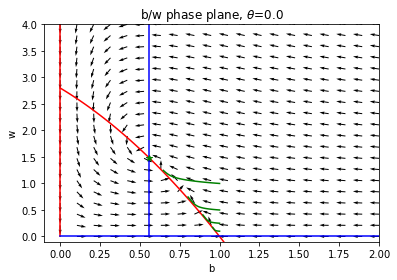

fixed points, b: 0.24888888888888885, w: 2.5237333333333334
Complex: real: -0.13916666666666655 imag: 0.34851968699375113


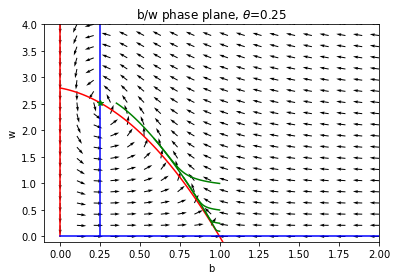

fixed points, b: 0.15999999999999998, w: 2.8224
Complex: real: -0.03499999999999992 imag: 0.493735759288306


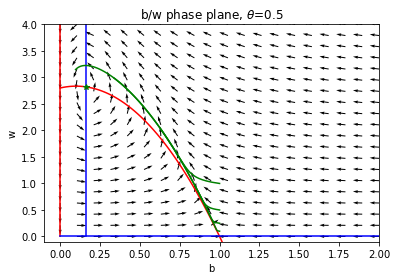

fixed points, b: 0.09333333333333332, w: 3.0464
Complex: real: 0.1733333333333329 imag: 0.6506065546003122


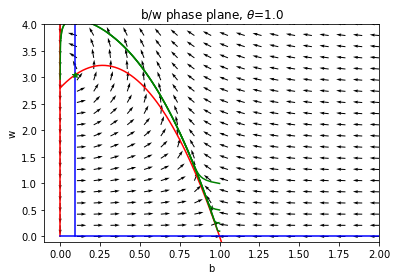

In [5]:
g     = 0.6
d     = 0.1
c     = 2.8
theta = 0.0
m     = 5.0

[plt0,axes0] = plot_phase(m,c,d,g,theta,2.0,4.0)
plotSolutions(m,c,d,g,theta,
              numpy.array([[1.0,1.0],[1.0,0.5],[1.0,0.25],[1.0,0.1]]),
              axes0)
linearization_eigenvalues(m,c,d,g,theta,axes0)
plt0.show()


theta = 0.25
[plt1,axes1] = plot_phase(m,c,d,g,theta,2.0,4.0)
plotSolutions(m,c,d,g,theta,
              numpy.array([[1.0,1.0],[1.0,0.5],[1.0,0.25],[1.0,0.1]]),
              axes1)
linearization_eigenvalues(m,c,d,g,theta,axes1)
plt1.show()

theta = 0.5
[plt2,axes2] = plot_phase(m,c,d,g,theta,2.0,4.0)
plotSolutions(m,c,d,g,theta,
              numpy.array([[1.0,1.0],[1.0,0.5],[1.0,0.25],[1.0,0.1]]),
              axes2)
linearization_eigenvalues(m,c,d,g,theta,axes2)
plt2.show()

theta = 1.0
[plt3,axes3] = plot_phase(m,c,d,g,theta,2.0,4.0)
plotSolutions(m,c,d,g,theta,
              numpy.array([[1.0,1.0],[1.0,0.5],[1.0,0.25],[1.0,0.1]]),
              axes3)
linearization_eigenvalues(m,c,d,g,theta,axes3)
plt3.show()



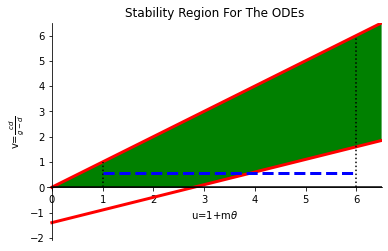

In [6]:
#g     = 0.4
#d     = 0.2
#c     = 0.7
#theta = 0.0
#m     = 0.78

maxU = 6.5
maxV = 6.5


fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.set_xlabel("u=1+m$\\theta$")
axes.set_ylabel("v=$\\frac{cd}{g-d}$")
axes.set_title("Stability Region For The ODEs")
#axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axes.set_xlim(-0.1, maxU)
axes.set_ylim(-c*0.75, maxV)

axes.fill_between(numpy.array([0.0,c,maxU]),
                  numpy.array([0.0,0.0,0.5*(maxU-c)]),
                  numpy.array([0.0,c,maxU]),facecolor='green')
axes.plot(numpy.array([0.0,maxU]),numpy.array([0.0,maxU]),'r',linewidth=3)
axes.plot(numpy.array([0.0,maxU]),numpy.array([-c/2.0,0.5*(maxU-c)]),'r',linewidth=3)
axes.plot(numpy.array([0.0,maxU]),numpy.array([0.0,0.0]),'k')
axes.plot(numpy.array([1.0,1.0]),numpy.array([0.0,1.0]),'k:')
axes.plot(numpy.array([1.0+m,1.0+m]),numpy.array([0.0,1.0+m]),'k:')
axes.spines['left'].set_position('zero')
axes.spines['bottom'].set_position('zero')
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')


u = c*d/(g-d)
p = axes.plot(numpy.array([1,1+m]),numpy.array([u,u]),'b--',linewidth=3)


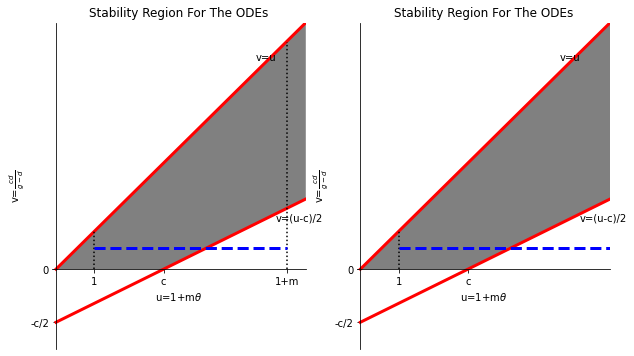

In [7]:
def plotStabilityRegion(axes,g,d,c,m,maxU,minU,maxV,minV):
    axes.set_xlabel("u=1+m$\\theta$")
    axes.set_ylabel("v=$\\frac{cd}{g-d}$")
    axes.set_title("Stability Region For The ODEs")
    #axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

    axes.fill_between(numpy.array([0.0,c,maxU]),
                      numpy.array([0.0,0.0,0.5*(maxU-c)]),
                      numpy.array([0.0,c,maxU]),facecolor='gray')
    axes.plot(numpy.array([0.0,maxU]),numpy.array([0.0,maxU]),'r',linewidth=3)
    axes.plot(numpy.array([0.0,maxU]),numpy.array([-c/2.0,0.5*(maxU-c)]),'r',linewidth=3)
    #axes.plot(numpy.array([0.0,maxU]),numpy.array([0.0,0.0]),'k')
    axes.plot(numpy.array([1.0,1.0]),numpy.array([0.0,1.0]),'k:')
    axes.plot(numpy.array([1.0+m,1.0+m]),numpy.array([0.0,1.0+m]),'k:')
    axes.set_xticks([c,1,1+m])
    axes.set_xticklabels(['c','1','1+m'])
    axes.set_yticks([-c/2,0])
    axes.set_yticklabels(['-c/2','0'])
    axes.spines['left'].set_position('zero')
    axes.spines['bottom'].set_position('zero')
    axes.spines['right'].set_color('none')
    axes.spines['top'].set_color('none')
    axes.text(.8*maxU,.8*maxU+.3,'v=u')
    axes.text(0.88*maxU,0.5*(0.88*maxU-c)-.2,'v=(u-c)/2')
    
    u = c*d/(g-d)
    axes.plot(numpy.array([1,1+m]),numpy.array([u,u]),'b--',linewidth=3)
    axes.set_xlim(minU, maxU)
    axes.set_ylim(minV, maxV)


#g     = 0.4
#d     = 0.2
#c     = 0.7
#theta = 0.0
#m     = 0.78

maxU = 6.5
maxV = 6.5


fig = plt.figure(figsize=(10,6))
axes1 = fig.add_subplot(1, 2, 1)
plotStabilityRegion(axes1,g,d,c,m,maxU,-0.1,maxV,-.75*c)
axes2 = fig.add_subplot(1, 2, 2)
plotStabilityRegion(axes2,g,d,c,m+0.75,maxU,-0.1,maxV,-.75*c)
#plt.tight_layout(pad=0.4,w_pad=0.4,h_pad=1.0)



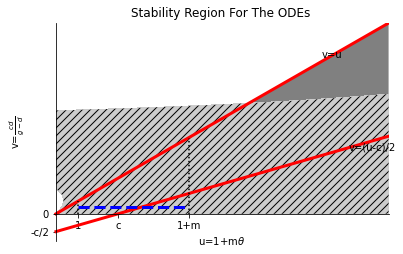

In [8]:
#g     = 0.4
#d     = 0.01
#c     = 10
#theta = 0.0
#m     = 6

maxU = 15.0
maxV = 15.0


x = numpy.linspace(0.0,maxU,200)
y = numpy.linspace(0.0,maxV,200)
u, v = numpy.meshgrid(x,y)
spiral = v*(u-2*v-c)-4.0*g*c*(u-v)

fig = plt.figure() # figsize=(10,6)
axesContour = fig.add_subplot(1, 1, 1)
plotStabilityRegion(axesContour,g,d,c,m,maxU,-0.1,maxV,-.75*c)
cont = axesContour.contourf(u,v,spiral,numpy.array([-100.0,0.0]),hatches=['///'],colors='0.8')
#fig.colorbar(cont)